In [34]:
from numpy import genfromtxt
from numpy import *
from matplotlib import *
import csv
from scipy import sparse
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [26]:
description = genfromtxt('description.csv', delimiter=',')

In [28]:
graph  = genfromtxt('graph.csv', delimiter=',')

In [17]:
social_evolution = genfromtxt('social_and_evolution.csv', delimiter=',')

In [30]:
m=1829
n=8000
X_dat=genfromtxt('description.csv',delimiter=',')
X_c=sparse.coo_matrix((m,n))
X_c.data=X_dat[:,2].astype(float64)
X_c.row=X_dat[:,0].astype(int32)
X_c.col=X_dat[:,1].astype(int32)
X=X_c.todense()

In [35]:
def cca(XA,XB,d):
    XA_c=matrix(XA-average(XA,0))
    XB_c=matrix(XB-average(XB,0))
    sig11=transpose(XA_c)*XA_c
    sig12=transpose(XA_c)*XB_c
    sig22=transpose(XB_c)*XB_c
    sig21=transpose(XB_c)*XA_c
    lambdaA,wA=linalg.eig(inv(sig11)*sig12*inv(sig22)*sig21)
    ind=argsort(lambdaA)[::-1]
    return XA_c*matrix(wA[:,ind[0:d]])

In [37]:
cca1 = cca(social_evolution,X,2)

In [38]:
cca1.shape

(1829, 2)

In [39]:
cca1_4dim = cca(social_evolution,X,4)

In [40]:
cca1_4dim.shape

(1829, 4)

In [41]:
%matplotlib inline


In [43]:
from matplotlib import pyplot as plt


In [48]:
cca1[:,0]

matrix([[ -2.11632731e-08+0.j],
        [ -3.89324125e-08+0.j],
        [  7.15934558e-08+0.j],
        ..., 
        [  3.88751640e-09+0.j],
        [  7.51666980e-08+0.j],
        [ -4.64423538e-08+0.j]])

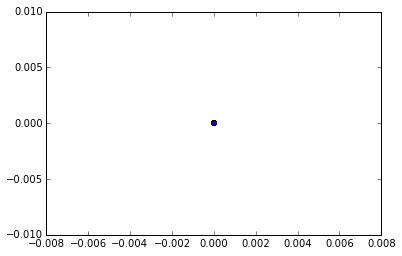

In [47]:
plt.scatter(cca1[:,0],cca1[:,1],s=area)
